# Домашняя Работа 1 Начало работы с данными

# Import библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

## Загрузка данных

In [2]:
df = pd.read_csv('data/cars_moldova.csv', delimiter = ',')
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro)
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0
2,Volkswagen,Golf,1998,Hatchback,1.0,1400.0,Petrol,Manual,2200.0
3,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0
4,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0
...,...,...,...,...,...,...,...,...,...
41002,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0
41003,Renault,Modus,2009,Hatchback,225.0,1500.0,Diesel,Manual,4500.0
41004,Mercedes,E Class,2016,Sedan,50000.0,1950.0,Diesel,Automatic,29500.0
41005,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0


## Предварительная обработка данных

In [3]:
print(df.duplicated().sum())

# удаление дубликатов
df = df.drop_duplicates()

# Переназначаем индексы строк, удаляем старные индексы
df = df.reset_index(drop=True)

df_base = df.copy()

df.info()

3743
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37264 entries, 0 to 37263
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  37264 non-null  object 
 1   Model                 37264 non-null  object 
 2   Year                  37264 non-null  int64  
 3   Style                 37264 non-null  object 
 4   Distance              37264 non-null  float64
 5   Engine_capacity(cm3)  37264 non-null  float64
 6   Fuel_type             37264 non-null  object 
 7   Transmission          37264 non-null  object 
 8   Price(euro)           37264 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 2.6+ MB


## Разделение численных и категориальных данных

In [4]:
category_columns = []
number_columns = []

for column_name in df.columns:
  if df[column_name].dtypes == object:
    category_columns += [column_name]
  else:
    number_columns += [column_name]
    
print('Категориальные данные:\t ',category_columns, '\n Число столблцов = ',len(category_columns))

print('Числовые данные:\t ',  number_columns, '\n Число столблцов = ',len(number_columns))      

Категориальные данные:	  ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission'] 
 Число столблцов =  5
Числовые данные:	  ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)'] 
 Число столблцов =  4


# 1 Задание. Визуализация данных

## Гистограмма

In [5]:
# Подготовка данных, для более понятной визуализации
question_dist = df[(df.Year <2021) & (df.Distance < 1200)]
df = df.drop(question_dist.index)

question_dist = df[(df.Distance > 1e6)]
df = df.drop(question_dist.index)

question_engine = df[df["Engine_capacity(cm3)"] < 180]
df = df.drop(question_engine.index)

question_engine = df[df["Engine_capacity(cm3)"] > 4200]
df = df.drop(question_engine.index)

question_price = df[(df["Price(euro)"] < 101)]
df = df.drop(question_price.index)

question_price = df[df["Price(euro)"] > 1e5]
df = df.drop(question_price.index)

df = df.reset_index(drop=True)
print(df)

             Make         Model  Year      Style  Distance  \
0          Toyota         Prius  2011  Hatchback  195000.0   
1         Renault  Grand Scenic  2014  Universal  135000.0   
2         Renault        Laguna  2012  Universal  110000.0   
3            Opel         Astra  2006  Universal  200000.0   
4        Mercedes          Vito  2000   Microvan  300000.0   
...           ...           ...   ...        ...       ...   
32274  Volkswagen        Passat  2016      Sedan   88000.0   
32275  Land Rover    Freelander  2002  Crossover  225000.0   
32276       Dacia     Logan Mcv  2015  Universal   89000.0   
32277       Mazda             6  2006      Combi  370000.0   
32278     Renault  Grand Scenic  2006    Minivan  300000.0   

       Engine_capacity(cm3)     Fuel_type Transmission  Price(euro)  
0                    1800.0        Hybrid    Automatic       7750.0  
1                    1500.0        Diesel       Manual       8550.0  
2                    1500.0        Diesel    

### Отрисовка гистограмм

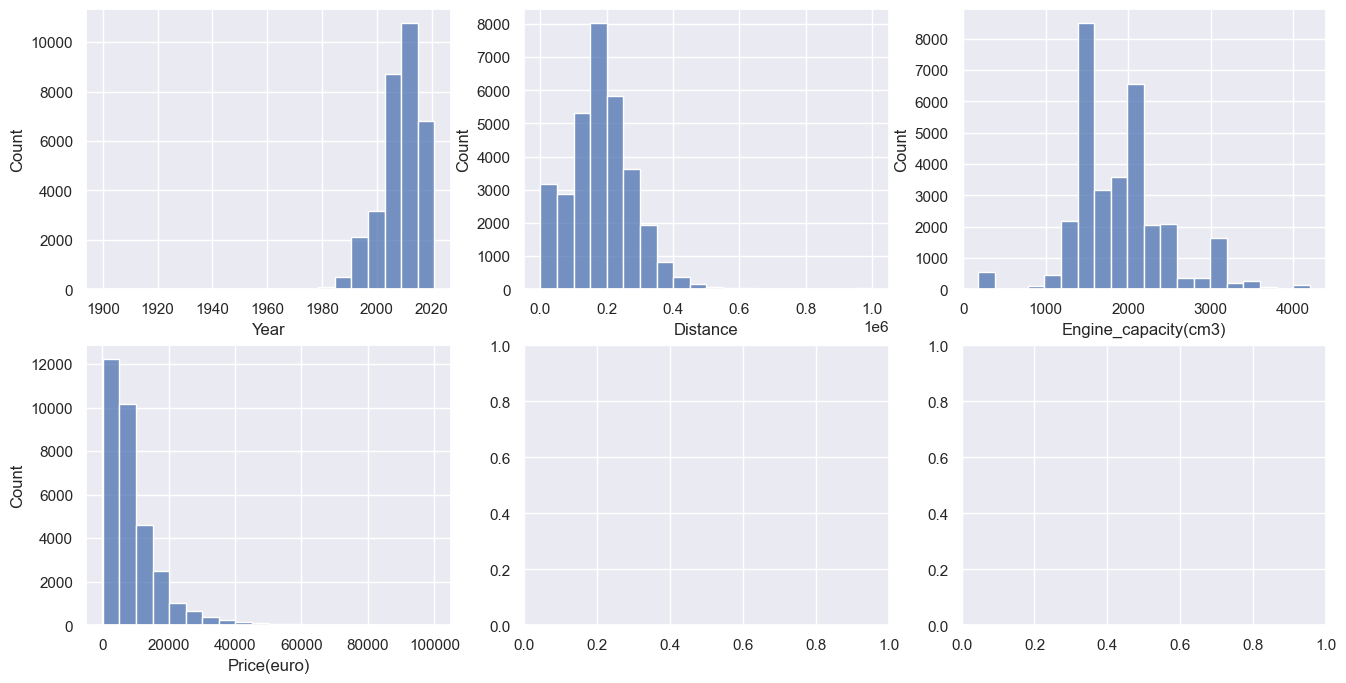

In [6]:
width = 3
height = int(np.ceil(len(number_columns)/width))
fig, ax = plt.subplots(nrows=height, ncols=width, figsize=(16,8))

for idx, column_name in enumerate(number_columns):

    plt.subplot(height,width, idx+1)
    sns.histplot(data=df,
            x=column_name, bins = 20);

## Скатерограмма


### Отрисовка скатерограммы
#### Использование hue, size, style

<AxesSubplot: xlabel='Distance', ylabel='Year'>

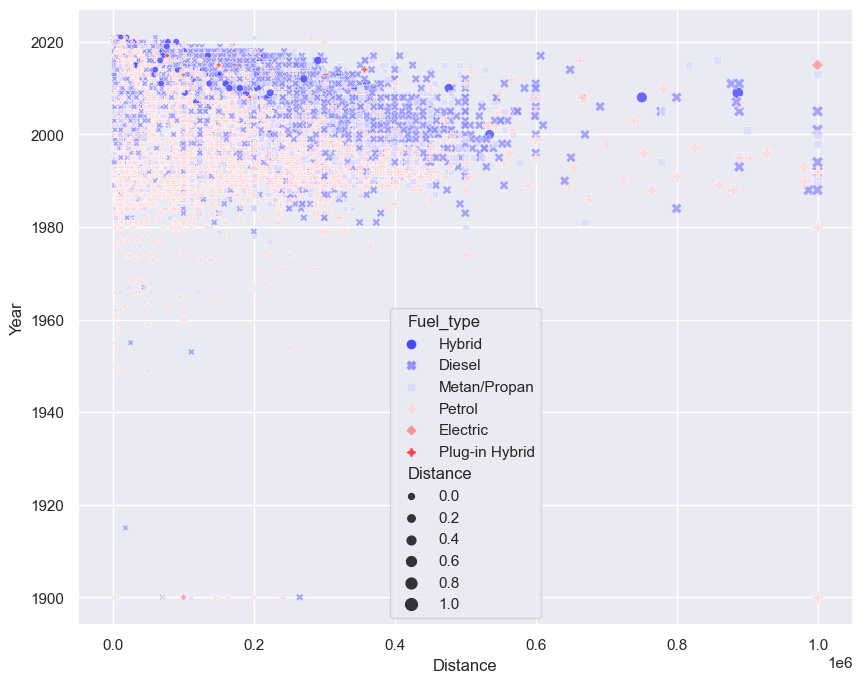

In [7]:
plt.figure(figsize = (10, 8))
sns.scatterplot(
  data=df,
  x="Distance", y="Year",
  hue = "Fuel_type",
  style = "Fuel_type",
  size = "Distance",
  alpha = 0.8,
  palette = 'bwr')

<AxesSubplot: xlabel='Distance', ylabel='Engine_capacity(cm3)'>

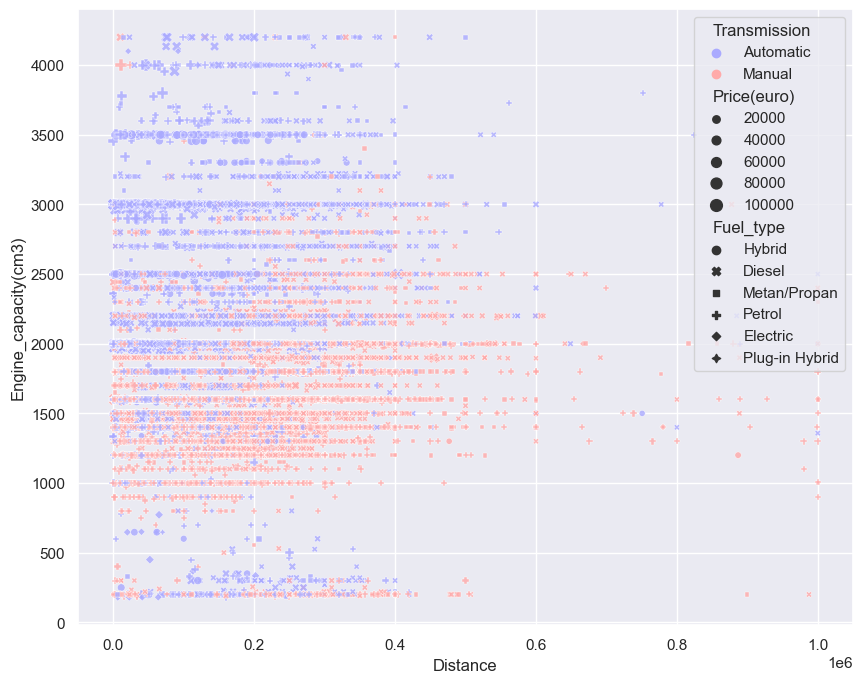

In [8]:
plt.figure(figsize = (10, 8))
sns.scatterplot(
  data=df,
  x="Distance", y="Engine_capacity(cm3)",
  hue = "Transmission",
  style = "Fuel_type",
  size = "Price(euro)",
  alpha = 0.8,
  palette = 'bwr')

# Задание 2. Добавление дополнительных признаков

In [9]:
df['Age'] = 2022 - df.Year

df['km_year'] = df.Distance/df.Age
question_km_year = df[df.km_year > 50e3]
df = df.drop(question_km_year.index)
question_km_year = df[df.km_year < 100]
df = df.drop(question_km_year.index)
df = df.reset_index(drop=True)

# Находим среднее значение порога
mean = np.ceil(df["km_year"].mean())

mean_min = mean - 5000
mean_max = mean + 5000

# Добавляем колонку с категориями
df["Distance_category"] = pd.Series(["Low mileage", "Middle mileage", "High mileage"])

# Меняем значение категории пробега в строках, на основе среднего порога.
for i, row in df.iterrows():
    if df.at[i, "km_year"] < mean_min:
      df.at[i, "Distance_category"] = "Low mileage"
  
    if df.at[i, "km_year"] > mean_max:
      df.at[i, "Distance_category"] = "High mileage"
      
    if df.at[i, "km_year"] < mean_max:
      df.at[i, "Distance_category"] = "Middle mileage"  
        
print(df.tail(5))

             Make         Model  Year      Style  Distance  \
32027  Volkswagen        Passat  2016      Sedan   88000.0   
32028  Land Rover    Freelander  2002  Crossover  225000.0   
32029       Dacia     Logan Mcv  2015  Universal   89000.0   
32030       Mazda             6  2006      Combi  370000.0   
32031     Renault  Grand Scenic  2006    Minivan  300000.0   

       Engine_capacity(cm3)     Fuel_type Transmission  Price(euro)  Age  \
32027                1800.0        Petrol    Automatic      11500.0    6   
32028                1800.0  Metan/Propan       Manual       4400.0   20   
32029                1500.0        Diesel       Manual       7000.0    7   
32030                2000.0        Diesel       Manual       4000.0   16   
32031                1500.0        Diesel       Manual       4000.0   16   

            km_year Distance_category  
32027  14666.666667    Middle mileage  
32028  11250.000000    Middle mileage  
32029  12714.285714    Middle mileage  
32030  231

In [10]:
df[category_columns].nunique()
manufacture_car_counts = df.Make.value_counts()

rare_cars = manufacture_car_counts[manufacture_car_counts < 500]
rare_cars = rare_cars.to_frame().reset_index()

# изменение заголовков
rare_cars = rare_cars.rename(columns = {'Make': "Count"})
rare_cars = rare_cars.rename(columns = {'index': "Make"})
rare_cars.index.name = 'index'

# цену редкости формируем на основе цен всех машин
average_price = np.ceil(df["Price(euro)"].mean())

df["Rarity_Price"] = pd.Series(['Rare_Cheap', 'Rare_Expensive'])

for i, row in df.iterrows():
  # поиск марок в таблице редких машин
  if not rare_cars.loc[rare_cars['Make'] == df.at[i, "Make"]].empty:
    # если цена меньше среднего, то машина редкая_дешевая
    if(df.at[i, "Price(euro)"] < average_price):
      df.at[i, "Rarity_Price"] = "Rare_Cheap"
      
    # если больше среднего, то машина редкая_дорогая 
    if(df.at[i, "Price(euro)"] > average_price):
      df.at[i, "Rarity_Price"] = "Rare_Expensive"  
      
df['Rarity_Price'].fillna("Average rarity", inplace=True)

print(df.tail(10))   

             Make          Model  Year      Style  Distance  \
32022        Opel          Astra  2012  Universal  180000.0   
32023      Toyota  Avensis Verso  2004    Minivan  245627.0   
32024     Renault         Megane  2011      Sedan  145000.0   
32025      Toyota          Auris  2007  Hatchback  222111.0   
32026       Skoda         Superb  2016  Cabriolet   78900.0   
32027  Volkswagen         Passat  2016      Sedan   88000.0   
32028  Land Rover     Freelander  2002  Crossover  225000.0   
32029       Dacia      Logan Mcv  2015  Universal   89000.0   
32030       Mazda              6  2006      Combi  370000.0   
32031     Renault   Grand Scenic  2006    Minivan  300000.0   

       Engine_capacity(cm3)     Fuel_type Transmission  Price(euro)  Age  \
32022                1300.0        Diesel       Manual       6400.0   10   
32023                2000.0        Diesel       Manual       7490.0   18   
32024                1500.0        Diesel    Automatic       6200.0   11   
32

# Задание 3. Применение различных методов предварительной обработки данных.

In [12]:
#№ Стандартизация
df_standartisation = df.copy()
df_mean = df[number_columns].mean()
std = df[number_columns].std()

df.to_csv("data/cars_moldova_fixed.csv")

df_standartisation[number_columns] = (df[number_columns] - df_mean) / std
df_standartisation.to_csv("data/cars_moldova_standardisation.csv")

#№ Нормализация
df_normalisation  = df.copy()
Xmin = df[number_columns].min()
Xmax = df[number_columns].max()

df_normalisation[number_columns] = (df[number_columns]- Xmin)/( Xmax - Xmin)
df_standartisation.to_csv("data/cars_moldova_normalisation.csv")

#№ One-Hot Encoding
df_ohe = df.copy()
df_ohe = pd.get_dummies(df_ohe)

df_ohe.to_csv("data/cars_moldova_ohe.csv")